In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [34]:
data = pd.read_csv('NE PAS TOUCHER.csv')
data.columns = data.columns.str.strip()

data

name  cargo_capacity             mass  crew  \
0    100i                                      2           48143      1   
1    125a                                      2           48143      1   
2    135c                                      6           48143      1   
3    300i                                      8           79677      1   
4    315p                                     12           80592      1   
..                           ...             ...              ...   ...   
196  X1 Force                                  0            4730      1   
197  X1 Velocity                               0            4730      1   
198  Zeus CL Mk II                           128          295000      3   
199  Zeus ES Mk II                            32          295000      3   
200  Zeus MR Mk II                            16     295000           3   

                                   manufacturer          type         status  \
0    Origin Jumpworks                            multi         flight-ready    
1    Origin Jumpworks                            multi         flight-ready    
2    Origin Jumpworks                            multi         flight-ready    
3    Origin Jumpworks                            multi         flight-ready    
4    Origin Jumpworks                            exploration   flight-ready    
..                                          ...           ...            ...   
196  Origin Jumpworks                            exploration   flight-ready    
197  Origin Jumpworks                            competition   flight-ready    
198  Roberts Space Industries                    transport     flight-ready    
199  Roberts Space Industries                    exploration   flight-ready    
200  Roberts Space Industries                    combat        in-concept      

                                                role  price   release_date  \
0      {'0': 'Starter', '1': 'Touring'}                50.0  2020            
1      {'0': 'Starter', '1': 'Light Fighter'}          60.0  2020            
2      {'0': 'Starter', '1': 'Light Freight'}          65.0  2020            
3      {'0': 'Touring', '1': 'Luxury'}                 60.0  2014            
4    {'0': 'Pathfinder'}                               65.0  2014            
..                                               ...    ...            ...   
196  {'0': 'Combat'}                                   50.0  2023            
197  {'0': 'Racing'}                                   45.0  2023            
198  {'0': 'Medium Freight'}                          150.0  2024            
199  {'0': 'Expedition'}                              150.0  2024            
200  {'0': 'Interdiction'}                            190.0  Unreleased      

        price_ingame      scm      max  length   beam  height  
0    1146600.0         260.0   1425.0    19.00  12.00    5.00  
1    1587600.0         260.0   1425.0    19.00  12.00    5.00  
2    1490580.0         260.0   1425.0    19.00  12.00    5.00  
3    1375920.0         260.0   1425.0    27.00  17.00    8.00  
4    1490580.0         260.0   1425.0    27.00  17.00    8.00  
..               ...      ...      ...     ...    ...     ...  
196  132300.0          207.0    569.0     1.55   5.19    1.87  
197  119070.0          222.0    611.0     1.55   5.19    1.87  
198  6804000.0         200.0   1000.0    45.70  34.30    7.00  
199  4422600.0         200.0   1050.0    45.70  34.30    7.00  
200                                      45.70  34.30    8.00  

[201 rows x 16 columns]

In [35]:
data.keys()

Index(['name', 'cargo_capacity', 'mass', 'crew', 'manufacturer', 'type',
       'status', 'role', 'price', 'release_date', 'price_ingame', 'scm', 'max',
       'length', 'beam', 'height'],
      dtype='object')

In [36]:
# Convert numeric columns, keeping original column names
numeric_columns = ['price_ingame', 'cargo_capacity', 'mass', 'crew', 'price', 'scm', 'max', 'length', 'beam', 'height']

for col in numeric_columns:
    # Find the matching column name with potential trailing spaces
    matching_col = [c for c in data.columns if c.strip() == col][0]
    # Convert to numeric and assign back to clean column name
    data[col] = pd.to_numeric(data[matching_col], errors='coerce')

In [37]:
# Define numeric columns that might have missing values
colonnes_avec_valeurs_manquantes = numeric_columns

copie_stardle_db = data.copy(deep=True)

# First pass: Fill with 0 if all values in a group are NaN
for (type_value, status_value), group_data in data.groupby(["type","status"]):
    for colonne in colonnes_avec_valeurs_manquantes:
        if group_data[colonne].isna().all():
            copie_stardle_db.loc[(copie_stardle_db["type"] == type_value) & (copie_stardle_db["status"] == status_value), colonne] = 0

# Second pass: Fill remaining NaN values with group means
for colonne in colonnes_avec_valeurs_manquantes:
    moyennes = data.groupby(["type","status"])[colonne].transform('mean')
    copie_stardle_db[colonne] = copie_stardle_db[colonne].fillna(moyennes)
    
    
data = copie_stardle_db

data

name  cargo_capacity      mass  crew  \
0    100i                                      2   48143.0     1   
1    125a                                      2   48143.0     1   
2    135c                                      6   48143.0     1   
3    300i                                      8   79677.0     1   
4    315p                                     12   80592.0     1   
..                           ...             ...       ...   ...   
196  X1 Force                                  0    4730.0     1   
197  X1 Velocity                               0    4730.0     1   
198  Zeus CL Mk II                           128  295000.0     3   
199  Zeus ES Mk II                            32  295000.0     3   
200  Zeus MR Mk II                            16  295000.0     3   

                                   manufacturer          type         status  \
0    Origin Jumpworks                            multi         flight-ready    
1    Origin Jumpworks                            multi         flight-ready    
2    Origin Jumpworks                            multi         flight-ready    
3    Origin Jumpworks                            multi         flight-ready    
4    Origin Jumpworks                            exploration   flight-ready    
..                                          ...           ...            ...   
196  Origin Jumpworks                            exploration   flight-ready    
197  Origin Jumpworks                            competition   flight-ready    
198  Roberts Space Industries                    transport     flight-ready    
199  Roberts Space Industries                    exploration   flight-ready    
200  Roberts Space Industries                    combat        in-concept      

                                                role  price   release_date  \
0      {'0': 'Starter', '1': 'Touring'}                50.0  2020            
1      {'0': 'Starter', '1': 'Light Fighter'}          60.0  2020            
2      {'0': 'Starter', '1': 'Light Freight'}          65.0  2020            
3      {'0': 'Touring', '1': 'Luxury'}                 60.0  2014            
4    {'0': 'Pathfinder'}                               65.0  2014            
..                                               ...    ...            ...   
196  {'0': 'Combat'}                                   50.0  2023            
197  {'0': 'Racing'}                                   45.0  2023            
198  {'0': 'Medium Freight'}                          150.0  2024            
199  {'0': 'Expedition'}                              150.0  2024            
200  {'0': 'Interdiction'}                            190.0  Unreleased      

     price_ingame    scm     max  length   beam  height  
0       1146600.0  260.0  1425.0   19.00  12.00    5.00  
1       1587600.0  260.0  1425.0   19.00  12.00    5.00  
2       1490580.0  260.0  1425.0   19.00  12.00    5.00  
3       1375920.0  260.0  1425.0   27.00  17.00    8.00  
4       1490580.0  260.0  1425.0   27.00  17.00    8.00  
..            ...    ...     ...     ...    ...     ...  
196      132300.0  207.0   569.0    1.55   5.19    1.87  
197      119070.0  222.0   611.0    1.55   5.19    1.87  
198     6804000.0  200.0  1000.0   45.70  34.30    7.00  
199     4422600.0  200.0  1050.0   45.70  34.30    7.00  
200           0.0   90.0   911.5   45.70  34.30    8.00  

[201 rows x 16 columns]

In [38]:
data.to_csv('data.csv')

In [39]:
# Obtenir la liste unique des types de vaisseaux
types_vaisseaux = data['type'].unique()

# Créer un dictionnaire pour stocker les différents DataFrames
df_by_type = {}

# Créer un DataFrame pour chaque type de vaisseau
for type_vaisseau in types_vaisseaux:
    df_by_type[type_vaisseau] = data[data['type'] == type_vaisseau].copy()

# Afficher les informations sur chaque DataFrame créé
for type_vaisseau, df in df_by_type.items():
    print(f"\nType de vaisseau: {type_vaisseau}")
    print(f"Nombre de vaisseaux: {len(df)}")
    print("-" * 50)


Type de vaisseau: multi       
Nombre de vaisseaux: 13
--------------------------------------------------

Type de vaisseau: exploration 
Nombre de vaisseaux: 22
--------------------------------------------------

Type de vaisseau: combat      
Nombre de vaisseaux: 70
--------------------------------------------------

Type de vaisseau: competition 
Nombre de vaisseaux: 14
--------------------------------------------------

Type de vaisseau: support     
Nombre de vaisseaux: 10
--------------------------------------------------

Type de vaisseau: industrial  
Nombre de vaisseaux: 14
--------------------------------------------------

Type de vaisseau: ground      
Nombre de vaisseaux: 28
--------------------------------------------------

Type de vaisseau: transport   
Nombre de vaisseaux: 30
--------------------------------------------------


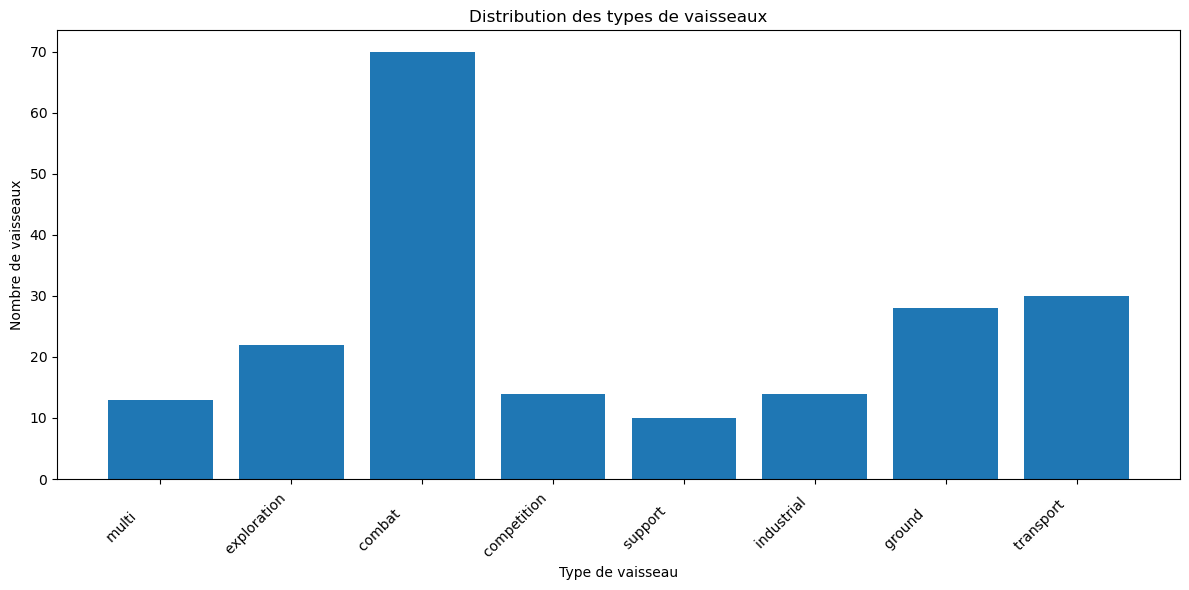

In [40]:
import matplotlib.pyplot as plt

# Préparer les données pour l'histogramme
types = list(df_by_type.keys())
counts = [len(df) for df in df_by_type.values()]

# Créer la figure avec une taille personnalisée
plt.figure(figsize=(12, 6))

# Créer l'histogramme
plt.bar(types, counts)

# Personnaliser le graphique
plt.title('Distribution des types de vaisseaux')
plt.xlabel('Type de vaisseau')
plt.ylabel('Nombre de vaisseaux')

# Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster automatiquement les marges
plt.tight_layout()

# Afficher le graphique
plt.show()

In [41]:
combat = df_by_type['combat      ']

combat

name  cargo_capacity       mass  crew  \
5    325a                                      4    79324.0     1   
12   A1 Spirit                                 0   314271.0     2   
13   A2 Hercules                             216  3139240.0     8   
16   Ares Star Fighter Inferno                 0   329001.0     1   
17   Ares Star Fighter Ion                     0   329001.0     1   
..                           ...             ...        ...   ...   
189  Vanguard Harbinger                        0   236604.0     2   
190  Vanguard Hoplite                          0   234870.0     2   
191  Vanguard Sentinel                         0   232170.0     2   
192  Vanguard Warden                           0   244270.0     2   
200  Zeus MR Mk II                            16   295000.0     3   

                                   manufacturer          type         status  \
5    Origin Jumpworks                            combat        flight-ready    
12   Crusader Industries                         combat        flight-ready    
13   Crusader Industries                         combat        flight-ready    
16   Crusader Industries                         combat        flight-ready    
17   Crusader Industries                         combat        flight-ready    
..                                          ...           ...            ...   
189  Aegis Dynamics                              combat        flight-ready    
190  Aegis Dynamics                              combat        flight-ready    
191  Aegis Dynamics                              combat        flight-ready    
192  Aegis Dynamics                              combat        flight-ready    
200  Roberts Space Industries                    combat        in-concept      

                                                role  price   release_date  \
5      {'0': 'Light Fighter', '1': 'Interdiction'}     70.0  2014            
12   {'0': 'Bomber'}                                  200.0  2023            
13   {'0': 'Heavy Bomber'}                            750.0  2021            
16   {'0': 'Heavy Fighter'}                           250.0  2021            
17   {'0': 'Heavy Fighter'}                           250.0  2021            
..                                               ...    ...            ...   
189  {'0': 'Bomber'}                                  290.0  2019            
190  {'0': 'Dropship'}                                240.0  2016            
191  {'0': 'Interdiction'}                            275.0  2019            
192  {'0': 'Heavy Fighter'}                           260.0  2016            
200  {'0': 'Interdiction'}                            190.0  Unreleased      

     price_ingame    scm     max  length  beam  height  
5       1852200.0  260.0  1425.0    27.5  17.0     8.0  
12      4961250.0  204.0  1130.0    47.5  44.0    10.0  
13     44296876.0  160.0   950.0    70.0  94.0    23.0  
16      4725000.0  210.0   110.0    27.0  30.0     6.0  
17      4725000.0  210.0  1100.0    27.0  30.0     6.0  
..            ...    ...     ...     ...   ...     ...  
189    11510100.0  219.0  1115.0    48.0  40.0     9.5  
190     9327150.0  209.0  1115.0    48.0  40.0     9.5  
191    10914750.0  217.0  1111.0    48.0  40.0     9.5  
192    10319400.0  215.0  1111.0    48.0  40.0     9.5  
200           0.0   90.0   911.5    45.7  34.3     8.0  

[70 rows x 16 columns]


Constructeur: Origin Jumpworks                          
Nombre de vaisseaux: 19
--------------------------------------------------

Constructeur: Crusader Industries                       
Nombre de vaisseaux: 11
--------------------------------------------------

Constructeur: Roberts Space Industries                  
Nombre de vaisseaux: 26
--------------------------------------------------

Constructeur: Anvil Aerospace                           
Nombre de vaisseaux: 28
--------------------------------------------------

Constructeur: Argo Astronautics                         
Nombre de vaisseaux: 8
--------------------------------------------------

Constructeur: Aegis Dynamics                            
Nombre de vaisseaux: 22
--------------------------------------------------

Constructeur: Esperia                                   
Nombre de vaisseaux: 5
--------------------------------------------------

Constructeur: Drake Interplanetary                      
Nombre de vai

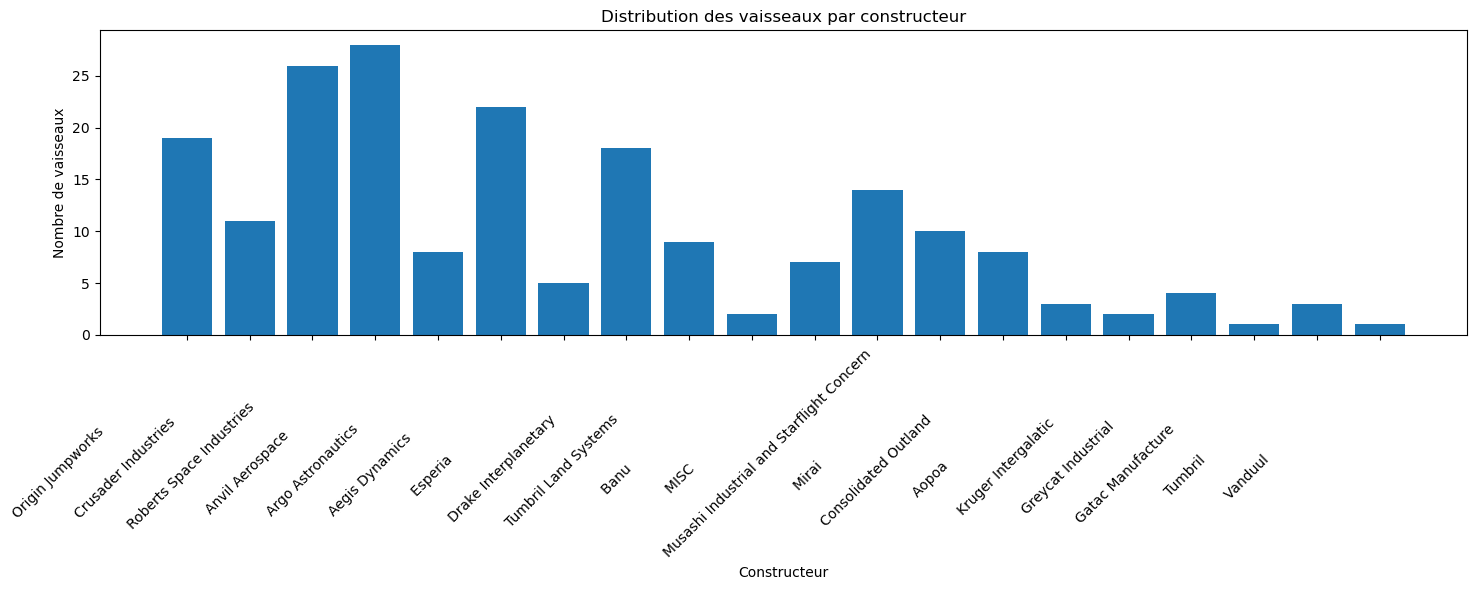

In [42]:
# Obtenir la liste unique des constructeurs
constructeurs = data['manufacturer'].unique()

# Créer un dictionnaire pour stocker les différents DataFrames
df_by_manufacturer = {}

# Créer un DataFrame pour chaque constructeur
for constructeur in constructeurs:
    df_by_manufacturer[constructeur] = data[data['manufacturer'] == constructeur].copy()

# Afficher les informations sur chaque DataFrame créé
for constructeur, df in df_by_manufacturer.items():
    print(f"\nConstructeur: {constructeur}")
    print(f"Nombre de vaisseaux: {len(df)}")
    print("-" * 50)

# Visualiser la distribution avec un graphique en barres
plt.figure(figsize=(15, 6))
manufacturers = list(df_by_manufacturer.keys())
counts = [len(df) for df in df_by_manufacturer.values()]

plt.bar(manufacturers, counts)
plt.title('Distribution des vaisseaux par constructeur')
plt.xlabel('Constructeur')
plt.ylabel('Nombre de vaisseaux')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# Créer un dictionnaire qui associe chaque constructeur à un nombre entier
constructeur_to_int = {constructeur: i for i, constructeur in enumerate(constructeurs)}

# Afficher les associations
print("Association constructeurs - nombres entiers :")
for constructeur, numero in constructeur_to_int.items():
    print(f"{constructeur}: {numero}")
    

Association constructeurs - nombres entiers :
Origin Jumpworks                          : 0
Crusader Industries                       : 1
Roberts Space Industries                  : 2
Anvil Aerospace                           : 3
Argo Astronautics                         : 4
Aegis Dynamics                            : 5
Esperia                                   : 6
Drake Interplanetary                      : 7
Tumbril Land Systems                      : 8
Banu                                      : 9
MISC                                      : 10
Musashi Industrial and Starflight Concern : 11
Mirai                                     : 12
Consolidated Outland                      : 13
Aopoa                                     : 14
Kruger Intergalatic                       : 15
Greycat Industrial                        : 16
Gatac Manufacture                         : 17
Tumbril                                   : 18
Vanduul                                   : 19


In [44]:
types = list(df_by_type.keys())


df_by_type_to_int = {type : i for i, type in enumerate(types)}

df_by_type_to_int

{'multi       ': 0,
 'exploration ': 1,
 'combat      ': 2,
 'competition ': 3,
 'support     ': 4,
 'industrial  ': 5,
 'ground      ': 6,
 'transport   ': 7}

In [45]:
"""coords = np.zeros((len(data), 2))
man = list(data['manufacturer_number'])
typ = list(data['type_number'])
# Fill the coord array with the corresponding numbers
for i in range(len(data)):
    coord = (man[i], typ[i])
    coords[i] = coord"""

"coords = np.zeros((len(data), 2))\nman = list(data['manufacturer_number'])\ntyp = list(data['type_number'])\n# Fill the coord array with the corresponding numbers\nfor i in range(len(data)):\n    coord = (man[i], typ[i])\n    coords[i] = coord"

In [46]:
# Créer un dictionnaire pour stocker les vaisseaux par rôle
ships_by_role = {}

# Pour chaque vaisseau dans le DataFrame
for _, row in data.iterrows():
    # Split les rôles (certains vaisseaux peuvent avoir plusieurs rôles)
    # Vérifier si la valeur est une chaîne avant de faire le split
    if pd.notna(row['role']):
        roles = str(row['role']).split(',')
        
        # Pour chaque rôle du vaisseau
        for role in roles:
            # Nettoyer le rôle
            role = role.split("'")[3]  # Enlever les espaces
            if role:  # Vérifier que le rôle n'est pas vide
                # Si le rôle n'existe pas encore dans le dictionnaire, créer une nouvelle liste
                if role not in ships_by_role:
                    ships_by_role[role] = []
                # Ajouter le nom du vaisseau à la liste correspondant à ce rôle
                name = row['name'].strip()
                ships_by_role[role].append(name)

In [ ]:
class ShipTreeNode:
    def __init__(self, ship_data):
        self.ship_data = ship_data
        self.left = None
        self.right = None
        self.name = ship_data['name']
        self.crew = ship_data['crew']
        self.manufacturer = ship_data['manufacturer']
        self.role = ship_data['role']
        self.type = ship_data['type']
        self.status = ship_data['status']

class ShipSearchTree:
    def __init__(self):
        self.root = None
        self.ship_nodes = {}
        self.distances_cache = {}
        self.paths_cache = {}
        self.path_usage = {}  
        self.paths_history = []  # Nouveau: historique des chemins parcourus

        
    def insert(self, ship_data):
        node = ShipTreeNode(ship_data)
        self.ship_nodes[ship_data['name']] = node
        
        if self.root is None:
            self.root = node
        else:
            self._insert_recursive(self.root, node)
            
    def _insert_recursive(self, current, node):
        if node.crew < current.crew:
            if current.left is None:
                current.left = node
            else:
                self._insert_recursive(current.left, node)
        else:
            if current.right is None:
                current.right = node
            else:
                self._insert_recursive(current.right, node)

    def calculate_distance(self, ship1_name, ship2_name):
        # Récupérer les noeuds des vaisseaux
        ship1 = self.ship_nodes[ship1_name]
        ship2 = self.ship_nodes[ship2_name]
        
        distance = 0
        
        # Distance basée sur l'équipage (normalisée)
        crew_diff = abs(ship1.crew - ship2.crew) / max(1, max(ship1.crew, ship2.crew))
        distance += crew_diff * 2
        
        # Pénalités pour les différences
        if ship1.manufacturer != ship2.manufacturer:
            distance += 1.5
        if ship1.type != ship2.type:
            distance += 1.0
        if ship1.role != ship2.role:
            distance += 1.0
        if ship1.status != ship2.status:
            distance += 0.5
            
        return distance

    def find_shortest_path(self, start_name, end_name):
        import heapq
        
        # Initialisation
        distances = {ship: float('inf') for ship in self.ship_nodes}
        distances[start_name] = 0
        pq = [(0, start_name, [start_name])]
        visited = set()
        
        while pq:
            current_distance, current_ship, path = heapq.heappop(pq)
            
            if current_ship == end_name:
                return path, current_distance
                
            if current_ship in visited:
                continue
                
            visited.add(current_ship)
            
            # Explorer les voisins
            for next_ship in self.ship_nodes:
                if next_ship not in visited:
                    distance = self.calculate_distance(current_ship, next_ship)
                    new_distance = current_distance + distance
                    
                    if new_distance < distances[next_ship]:
                        distances[next_ship] = new_distance
                        new_path = path + [next_ship]
                        heapq.heappush(pq, (new_distance, next_ship, new_path))
        
        return None, None

    def record_path_usage(self, path):
        """Enregistre l'utilisation des nœuds dans un chemin"""
        for i in range(len(path)-1):
            node1 = path[i]
            node2 = path[i+1]
            edge = tuple(sorted([node1, node2]))
            
            if edge not in self.path_usage:
                self.path_usage[edge] = 0
            self.path_usage[edge] += 1

    def save_path_history(self, path, total_distance):
        """Sauvegarde l'historique d'un chemin parcouru"""
        path_info = {
        'path': path,
        'distance': total_distance,
        'details': []
    }
    
        for i in range(len(path)):
            node = self.ship_nodes[path[i]]
            node_info = {
            'name': node.name,
            'manufacturer': node.manufacturer,
            'crew': node.crew,
            'role': node.role,
            'type': node.type,
            'status': node.status
            }
        
            if i < len(path) - 1:
                next_node = self.ship_nodes[path[i + 1]]
                distance = self.calculate_distance(node.name, next_node.name)
                node_info['distance_to_next'] = distance
        
            path_info['details'].append(node_info)
        
        self.paths_history.append(path_info)
        
        
# Utilisation :
def search_path():
    ship_tree = ShipSearchTree()
    
    # Insérer tous les vaisseaux
    for _, row in data.iterrows():
        ship_tree.insert(row)
    
    # Afficher la liste des vaisseaux
    print("Liste des vaisseaux disponibles:")
    ships = list(ship_tree.ship_nodes.keys())
    for idx, name in enumerate(ships):
        print(f"{idx + 1}. {name}")
    
    # Demander les vaisseaux de départ et d'arrivée
    start_idx = int(input("\nChoisir le numéro du vaisseau de départ: ")) - 1
    end_idx = int(input("Choisir le numéro du vaisseau d'arrivée: ")) - 1
    
    path, total_distance = ship_tree.find_shortest_path(ships[start_idx], ships[end_idx])
    
    if path:
        print(f"\nChemin le plus court trouvé (distance totale: {total_distance:.2f}):")
        for i in range(len(path)):
            node = ship_tree.ship_nodes[path[i]]
            print(f"\n{node.name}:")
            print(f"  Fabricant: {node.manufacturer}")
            print(f"  Équipage: {node.crew}")
            print(f"  Rôle: {node.role}")
            print(f"  Type: {node.type}")
            print(f"  Statut: {node.status}")
            
            if i < len(path) - 1:
                next_node = ship_tree.ship_nodes[path[i + 1]]
                dist = ship_tree.calculate_distance(node.name, next_node.name)
                print(f"\n  Distance jusqu'au prochain vaisseau: {dist:.2f}")
                print("  ↓")
    else:
        print("\nAucun chemin trouvé entre ces vaisseaux.")
        
def show_ship_paths():
    ship_tree = ShipSearchTree()
    for _, row in data.iterrows():
        ship_tree.insert(row)
    
    ships = list(ship_tree.ship_nodes.keys())

    for idx in range(len(ships)):
        for jdx in range(idx+1, len(ships)):
            start_ship = ships[idx]
            end_ship = ships[jdx]
            
            nodes_path, total_distance = ship_tree.find_shortest_path(start_ship, end_ship)
            
            if nodes_path:
                # Enregistrer l'utilisation du chemin
                ship_tree.record_path_usage(nodes_path)
                # Sauvegarder l'historique du chemin
                ship_tree.save_path_history(nodes_path, total_distance)
                
                print(f"\nPlus court chemin trouvé (distance totale: {total_distance:.2f}):")
                for i, node_name in enumerate(nodes_path):
                    node = ship_tree.ship_nodes[node_name]
                    print(f"\n{node.name}")
                    
                    if i < len(nodes_path) - 1:
                        next_node_name = nodes_path[i + 1]
                        next_node = ship_tree.ship_nodes[next_node_name]
                        dist = ship_tree.calculate_distance(node.name, next_node.name)

        
    # Sauvegarder l'historique dans un fichier CSV
    import pandas as pd
    paths_df = []
    for path_info in ship_tree.paths_history:
        path_row = {
            'start_ship': path_info['details'][0]['name'],
            'end_ship': path_info['details'][-1]['name'],
            'total_distance': path_info['distance'],
            'path': ' -> '.join([node['name'] for node in path_info['details']])
        }
        paths_df.append(path_row)
    
    pd.DataFrame(paths_df).to_csv('paths_history.csv', index=False)
    print("\nHistorique des chemins sauvegardé dans 'paths_history.csv'")       
                    
# Exécuter la recherche interactive
show_ship_paths()
# Lancer la recherche
#search_path()


Plus court chemin trouvé (distance totale: 1.00):

100i                       

  Distance jusqu'au prochain vaisseau: 1.00
125a                       

125a                       

Plus court chemin trouvé (distance totale: 1.00):

100i                       

  Distance jusqu'au prochain vaisseau: 1.00
135c                       

135c                       

Plus court chemin trouvé (distance totale: 1.00):

100i                       

  Distance jusqu'au prochain vaisseau: 1.00
300i                       

300i                       

Plus court chemin trouvé (distance totale: 2.00):

100i                       

  Distance jusqu'au prochain vaisseau: 2.00
315p                       

315p                       

Plus court chemin trouvé (distance totale: 2.00):

100i                       

  Distance jusqu'au prochain vaisseau: 2.00
325a                       

325a                       

Plus court chemin trouvé (distance totale: 2.00):

100i                       

  Distanc